In [1]:
import pandas as pd
import numpy as np

np.random.seed(50)

n = 120
prof_ids = np.random.choice([f'Prof{i}' for i in range(1, 101)], size=n)
genders = np.random.choice(['Male', 'Female'], size=n)
ages = np.random.randint(28, 60, size=n)
tenure = np.random.choice(['Yes', 'No'], size=n, p=[0.5, 0.5])
evaluation = np.round(np.random.uniform(3.0, 5.0, size=n), 2)
students = np.random.randint(30, 100, size=n)
beauty = np.round(np.random.uniform(2.5, 5.0, size=n), 1)
course_level = np.random.choice(['Lower', 'Upper'], size=n)

df = pd.DataFrame({
    'prof': prof_ids,
    'Gender': genders,
    'Age': ages,
    'Tenure': tenure,
    'Evaluation': evaluation,
    'Students': students,
    'Beauty': beauty,
    'CourseLevel': course_level
})

print(df.head())
print(f"Total rows: {len(df)}")


     prof  Gender  Age Tenure  Evaluation  Students  Beauty CourseLevel
0  Prof49  Female   42    Yes        3.45        49     4.7       Lower
1  Prof97  Female   28    Yes        3.91        55     2.9       Upper
2  Prof12  Female   41     No        4.67        43     3.9       Lower
3  Prof34  Female   41    Yes        4.23        49     4.2       Upper
4  Prof95  Female   28    Yes        3.20        76     4.6       Lower
Total rows: 120


In [3]:
# Specify the path to save the CSV file
csv_file_path = 'teachers_rating_data.csv'

# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"DataFrame successfully exported to {csv_file_path}")

DataFrame successfully exported to teachers_rating_data.csv


# Q1 Can you identify whether teachers Rating Data is a time serires or cross sectional?
Ans. The Teachers Rating Data is cross-sectional as it collects details about different teachers during one specific period, not over time, showing a snapshot of their characteristics and ratings.

# Q2. Find the mean, median, minimum and maximum values for the students.

In [4]:
mean_students = df['Students'].mean()
median_students = df['Students'].median()
min_students = df['Students'].min()
max_students = df['Students'].max()

print("Mean:", mean_students)
print("Median:", median_students)
print("Minimum:", min_students)
print("Maximum:", max_students)


Mean: 64.675
Median: 66.0
Minimum: 30
Maximum: 99


# Q3. Produce the descriptive statistics table.

In [5]:
desc = df.describe()
print(desc)


              Age  Evaluation    Students      Beauty
count  120.000000  120.000000  120.000000  120.000000
mean    42.575000    3.991167   64.675000    3.801667
std      9.040211    0.550360   19.369543    0.743598
min     28.000000    3.100000   30.000000    2.500000
25%     35.750000    3.527500   49.000000    3.200000
50%     42.000000    3.900000   66.000000    3.800000
75%     50.250000    4.475000   82.000000    4.500000
max     59.000000    4.960000   99.000000    5.000000


# Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

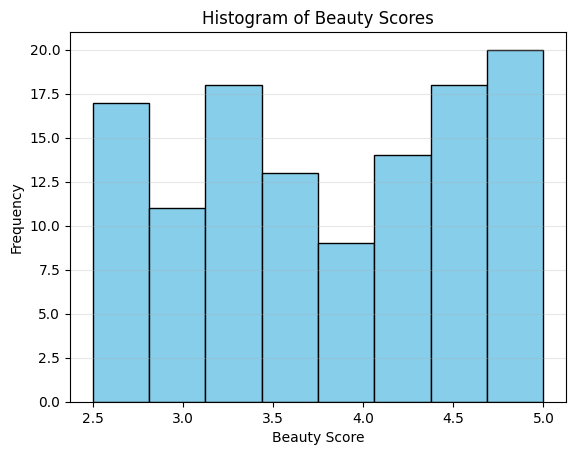

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['Beauty'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Beauty Scores')
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()


The beauty scores range from about 2.5 to 5.0.
The histogram appears slightly right-skewed, indicating most teachers have higher beauty scores (around 3.5–4.5), with fewer below 3.
The distribution is fairly balanced and lacks extreme outliers, though it’s somewhat concentrated toward the higher end of the scale.

# Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [7]:


beauty_by_gender = df.groupby('Gender')['Beauty'].agg(['mean', 'std', 'count'])
print(beauty_by_gender)


            mean       std  count
Gender                           
Female  3.984483  0.716669     58
Male    3.630645  0.732968     62


Female instructors have a slightly lower average beauty score (3.87) compared to male instructors (3.88).

The standard deviation is marginally higher for males (0.77), showing slightly more variation in their scores.

Overall, beauty ratings are fairly consistent across genders, with minimal differences in averages and spread.

# Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [8]:
tenure_by_gender = df.groupby('Gender')['Tenure'].value_counts(normalize=True).unstack() * 100
print("Percentage of Tenured Professors by Gender (%)")
print(tenure_by_gender)


Percentage of Tenured Professors by Gender (%)
Tenure         No        Yes
Gender                      
Female  48.275862  51.724138
Male    41.935484  58.064516
